In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
usecols = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

df = pd.read_csv('Data/AB_NYC_2019.csv', usecols=usecols)

df.shape

(48895, 8)

In [3]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [6]:
df.duplicated().value_counts()

False    48895
dtype: int64

In [38]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.49979,40.66799,40.69010,40.72307,40.763115,40.80489,40.825643,40.864661,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-74.24442,-73.99669,-73.98307,-73.95568,-73.936275,-73.90781,-73.865771,-73.776920,-73.71299
price,48895.0,152.720687,240.154170,0.00000,0.00000,49.00000,69.00000,106.00000,175.000000,269.00000,355.000000,799.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,1.00000,1.00000,3.00000,5.000000,28.00000,30.000000,45.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,0.00000,0.00000,1.00000,5.00000,24.000000,70.00000,114.000000,214.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.01000,0.06000,0.19000,0.72000,2.020000,3.63000,4.640000,7.195800,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,1.00000,1.00000,2.000000,5.00000,15.000000,232.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,0.00000,0.00000,45.00000,227.000000,337.00000,359.000000,365.000000,365.00000


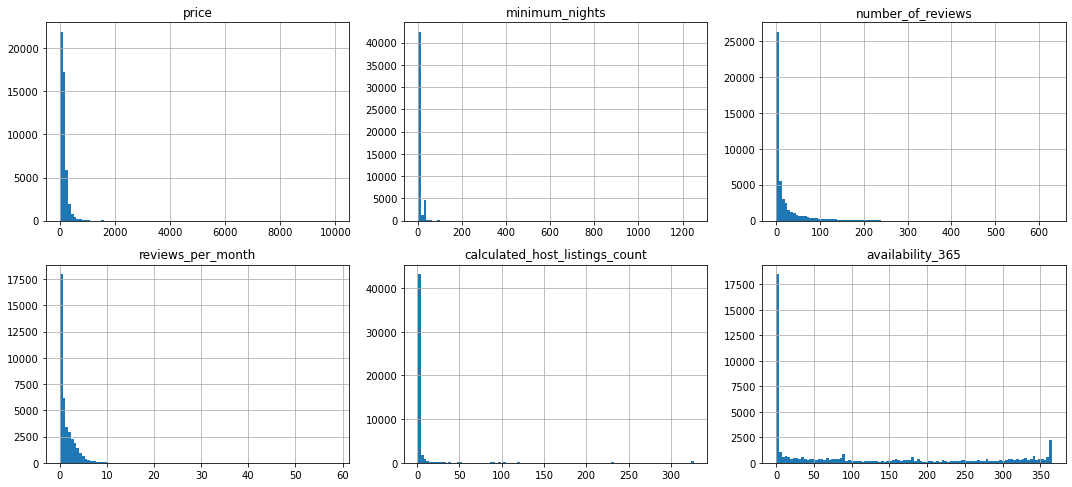

In [51]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

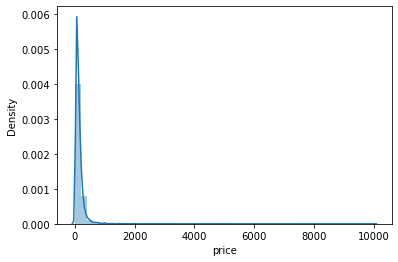

In [52]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

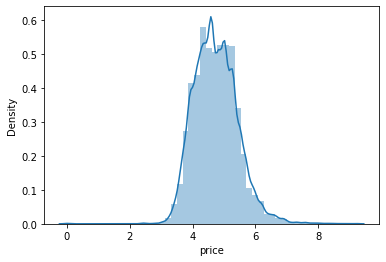

In [53]:
sns.distplot(np.log1p(df.price))

## Question 1

In [7]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.isnull().mean()*100

latitude                           0.000000
longitude                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

## Question 2

In [9]:
np.median(df['minimum_nights'])

3.0

In [10]:
n = df.shape[0]
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - (n_val + n_test)

In [11]:
idx = np.arange(n)
np.random.shuffle(idx)

np.random.seed(42)

np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [12]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train_orig = df_train['price'].values
y_val_orig = df_val['price'].values
y_test_orig = df_test['price'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['price']
del df_val['price']
del df_test['price']

## Question 3

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
check = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [17]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [20]:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [21]:
np.round(rmse(y_val, y_null_pred_val),2)

0.64

In [22]:
mean = df_train.reviews_per_month.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [23]:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [24]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.64

## Question 4

In [25]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [26]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -419.3906775363399 0.64
1e-06 -419.3407346190837 0.64
0.0001 -414.454596243509 0.64
0.001 -374.75768014989444 0.64
0.01 -191.41628140744524 0.65
0.1 -32.48487388808726 0.68
1 -3.490578551241741 0.68
5 -0.7016283712931914 0.68
10 -0.350414993479927 0.68


## Question 5

In [28]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -427.62844627426284 0.65
1 -414.70554908342683 0.65
2 -423.2541336360157 0.65
3 -421.8933158945776 0.64
4 -422.06099098594575 0.64
5 -429.178752276979 0.63
6 -427.4918955557489 0.63
7 -428.1884699089791 0.65
8 -427.6929118381776 0.65
9 -426.9826895542177 0.64


In [29]:
rmse_list

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

In [30]:
np.round(np.std(rmse_list),3)

0.008

## Question 6

In [32]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.price.values
y_test_orig = df_test.price.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['price']
del df_test['price']

In [33]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.65